In [2]:
import pandas as pd
import numpy as np

In [10]:
pd.options.mode.chained_assignment = None  # default='warn'
houshold_raw = pd.read_stata('/Users/maxweber/Desktop/DataMasterThesis/JOLE share/household.dta')

In [11]:
houshold_raw.columns

Index(['ssuid', 'swave', 'srefmon', 'month', 'year', 'ehrefper', 'whfnwgt',
       'tfearn', 'tftotinc', 'epppnum', 'tage', 'tpearn', 'tptotinc', 'rf_new',
       'famsize', 'totearn', 'totinc', 'spouse', 'earn_male', 'earn_female',
       'sex_if_single', 'flex', 'moonlit', 'selfemp', 'totwork', 'totcens',
       'type', 'reb_spend', 'reb_save', 'reb_debt', 'reb4', 'amt4', 'reb5',
       'amt5', 'reb6', 'amt6', 'reb7', 'amt7', 'reb8', 'amt8', 'reb9', 'amt9',
       'reb10', 'amt10', 'reb11', 'amt11', 'reb12', 'amt12'],
      dtype='object')

# Data Exploration and Descritption

In [12]:
houshold_raw.shape

(417829, 48)

In [13]:
houshold_raw[['ssuid', 'swave', 'srefmon', 'month', 'year', 'ehrefper', 'whfnwgt',
       'tfearn', 'tftotinc', 'epppnum', 'tage', 'tpearn', 'tptotinc', 'rf_new',
       'famsize', 'totearn', 'totinc']].describe()

,swave,year,ehrefper,whfnwgt,tfearn,tftotinc,rf_new,famsize,totearn,totinc
count,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000
mean,2.706346,2008.609352,101.236724,3165.464649,5259.549957,5760.240783,2.571911,2.845865,4950.686035,5392.017578
std,1.342574,0.487896,4.006889,1275.666959,5781.356315,5822.155966,1.389535,1.567134,5646.872070,5679.446289
min,1.000000,2008.000000,101.000000,0.000000,-50000.000000,-48591.000000,1.000000,1.000000,-50000.000000,-50000.000000
25%,2.000000,2008.000000,101.000000,2191.241500,1650.000000,2161.000000,1.000000,2.000000,1443.000000,1906.000000
50%,3.000000,2009.000000,101.000000,3050.485400,3984.000000,4351.000000,2.000000,3.000000,3634.000000,4001.000000
75%,4.000000,2009.000000,101.000000,3907.595200,7167.000000,7591.000000,4.000000,4.000000,6751.000000,7116.000000
max,5.000000,2009.000000,205.000000,25529.882800,98083.000000,101970.000000,28.000000,22.000000,98083.000000,98686.000000


In [14]:
houshold_raw[[ 'spouse', 'earn_male', 'earn_female', 'sex_if_single', 'flex', 'moonlit', 'selfemp', 'totwork', 
          'totcens','type', 'reb_spend', 'reb_save', 'reb_debt']].describe()

,spouse,earn_male,earn_female,sex_if_single,flex,moonlit,selfemp,totwork,totcens,type,reb_spend,reb_save,reb_debt
count,417829.000000,311053.000000,348261.000000,176344.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000
mean,0.577952,4118.764648,2260.470215,1.605498,0.560521,0.022469,0.175218,1.170443,0.038437,1.244471,0.267959,0.161320,0.617985
std,0.495003,4972.812012,3066.344238,0.489045,0.655534,0.152112,0.423538,0.673011,0.200358,0.429727,0.565415,0.462197,0.713390
min,0.000000,-50000.000000,-20588.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1198.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,3124.000000,1583.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,5417.000000,3333.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,96244.000000,93500.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [15]:
print('\n percentage of HHs getting rebate: ', houshold_raw[['reb4', 'reb5', 'reb6', 'reb7', 'reb8','reb9', 
                'reb10', 'reb11', 'reb12']].describe()[1:2].sum().sum(),'\n')

houshold_raw[['reb4', 'reb5', 'reb6', 'reb7', 'reb8','reb9', 'reb10', 'reb11', 'reb12']].describe()


 percentage of HHs getting rebate:  0.8130646876525134 



,reb4,reb5,reb6,reb7,reb8,reb9,reb10,reb11,reb12
count,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000
mean,0.058196,0.242484,0.266724,0.182261,0.038202,0.010966,0.006955,0.005158,0.002118
std,0.234093,0.428915,0.441937,0.386899,0.191129,0.103797,0.082946,0.071507,0.045937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

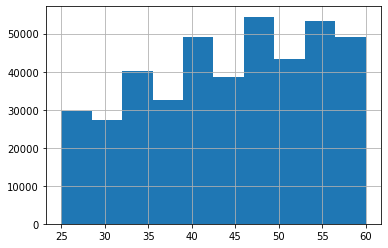

In [16]:
houshold_raw['tage'].hist()

In [17]:
houshold_raw[['earn_male', 'earn_female']].describe()

,earn_male,earn_female
count,311053.000000,348261.000000
mean,4118.764648,2260.470215
std,4972.812012,3066.344238
min,-50000.000000,-20588.000000
25%,1198.000000,0.000000
50%,3124.000000,1583.000000
75%,5417.000000,3333.000000
max,96244.000000,93500.000000


# Data Cleaning and Subsetting

(198574, 48)

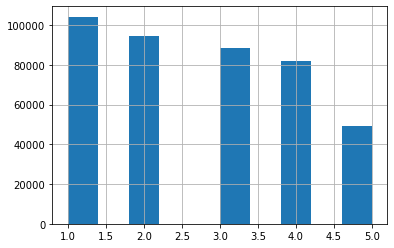

In [19]:
houshold_raw['swave'].hist()
houshold = houshold_raw[houshold_raw.swave <= 2]
houshold.shape

In [20]:
houshold['ssuid'] = houshold['ssuid'].astype(int)

In [21]:
#houshold['epppnum'].unique().shape #11
#houshold['ssuid'].unique().shape #26519

houshold['pp'] = houshold.groupby(['ssuid','epppnum']).ngroup() #26569 unique
pp_count = houshold.groupby(['pp']).size() # need index for merging!

houshold = houshold.merge(pp_count.rename('pp_count'), how = 'outer', left_on = 'pp', right_index = True)
houshold = houshold[houshold['pp_count']== 8]

print(len(houshold['pp'].unique())) #  N = 22998 as in figure 1 (results) Powell(2020) (dropped ~4k)
print(len(houshold['ssuid'].unique()))
houshold.shape # (198574, 51)

22998
22998


(183984, 50)

there are a lot of HHs with more than 8 periods available!


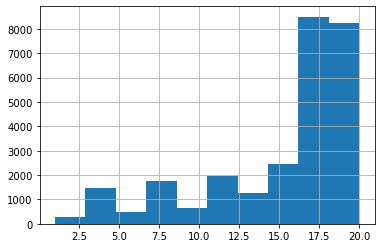

In [22]:
houshold2 = houshold_raw
houshold2['pp'] = houshold_raw.groupby(['ssuid','epppnum']).ngroup() #26569 unique
#houshold2.drop('pp', axis=1, inplace=True)
pp_count = houshold2.groupby(['pp']).size() # need index for merging!
pp_count.hist()
del houshold2
#houshold2 = houshold2.merge(pp_count.rename('pp_count'), how = 'outer', left_on = 'pp', right_index = True)
#houshold2[houshold2['pp_count']< 8].shape
print('there are a lot of HHs with more than 8 periods available!')

In [23]:
houshold.set_index('pp', inplace = True)
houshold.head()

,ssuid,swave,srefmon,month,year,ehrefper,whfnwgt,tfearn,tftotinc,epppnum,...,amt8,reb9,amt9,reb10,amt10,reb11,amt11,reb12,amt12,pp_count
pp,,,,,,,,,,,,,,,,,,,,,
0,19128000276,2,Fourth Reference month,January,2009,101,3973.9954,0,381,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,19128000276,1,First Reference month,June,2008,101,3282.6489,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,19128000276,1,Second Reference month,July,2008,101,3269.0889,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,19128000276,1,Third Reference month,August,2008,101,3262.1228,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,19128000276,1,Fourth Reference month,September,2008,101,3242.7625,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [24]:
houshold['amt_tot'] = houshold[['amt4', 'amt5', 'amt6','amt7', 'amt8','amt9', 'amt10', 'amt11', 'amt12']].sum(axis=1)
houshold['amt_tot'].describe()

count    183984.000000
mean        728.870422
std         560.518372
min           0.000000
25%         300.000000
50%         600.000000
75%        1200.000000
max        4500.000000
Name: amt_tot, dtype: float64

In [25]:
#  sum of all rebate dummy columns
houshold['everreb'] = houshold[['reb4', 'reb5', 'reb6', 'reb7','reb8','reb9', 'reb10', 'reb11', 'reb12']].sum(axis=1)
houshold['everreb'].describe()

count    183984.000000
mean          0.816941
std           0.386538
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: everreb, dtype: float64


 If unable to use NaN in lags, also look for which timeframe has the largest obs-count 



<AxesSubplot:>

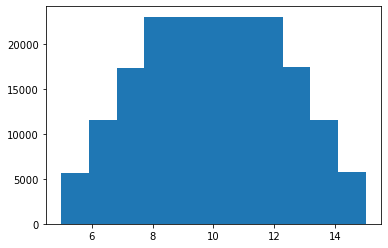

In [26]:
month_number_dict = {
    'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12
}

houshold.replace({'month': month_number_dict}, inplace = True)

# lambda function to get total month (Jan 2008 != Jan 2009)
def get_total_month(year,month):
    if year == 2009:
        return month+12
    else:
        return month
        
houshold['month_total'] = houshold.apply(lambda x: get_total_month(x['year'],x['month']),axis=1)

print('\n If unable to use NaN in lags, also look for which timeframe has the largest obs-count \n')

houshold['month_total'].hist(grid=False, bins = len(houshold['month_total'].unique()))

In [27]:
# get month of payout from rebX columns
houshold['reb_month'] = houshold[['reb4', 'reb5', 'reb6', 'reb7','reb8','reb9', 'reb10', 'reb11',
          'reb12']].idxmax(axis=1).str.slice(start = 3)

def correct_reb_month(reb_month,everreb):
    if everreb == 0:
        return np.NaN
    else:
        return reb_month
        
houshold['reb_month'] = houshold.apply(lambda x: correct_reb_month(x['reb_month'],x['everreb']),axis=1)

houshold['reb_month'].unique()

array([nan, '5', '6', '4', '7', '8', '10', '9', '11', '12'], dtype=object)

In [28]:
#houshold[houshold['reb_month']<=7]['reb_month'].hist()
#houshold[houshold['reb_month']>7]['reb_month'].hist()
houshold['reb_month'].unique()

array([nan, '5', '6', '4', '7', '8', '10', '9', '11', '12'], dtype=object)

In [29]:
houshold['reb_month'] = pd.to_numeric(houshold['reb_month'])
houshold['lag_time'] =  houshold['month_total'] - houshold['reb_month']
print(houshold['lag_time'].unique())
houshold['lag_time'].describe()

[nan  8.  1.  2.  3.  4.  5.  6.  7.  0.  9. -1. -2. -4. -3. -5. 10. 11.
 -6. -7.]


count    150304.000000
mean          3.995423
std           2.807277
min          -7.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          11.000000
Name: lag_time, dtype: float64

In [30]:
# generate dummy for change in maritial status
spouse_sum = houshold.groupby(['pp'])['spouse'].sum()
houshold = houshold.merge(houshold.groupby(['pp'])['spouse'].sum(), on = 'pp', how = 'left' )
houshold['spouse'] = houshold['spouse_x']
houshold['spouse_sum'] = houshold['spouse_y']
houshold.drop('spouse_x', axis = 1, inplace = True)
houshold.drop('spouse_y', axis = 1, inplace = True)

def get_change_spouse(spouse_sum):
    if spouse_sum == 0 or spouse_sum == 8 :
        return 0
    else:
        return 1
        
houshold['change_spouse'] = houshold.apply(lambda x: get_change_spouse(x['spouse_sum']),axis=1)

houshold[['change_spouse', 'spouse_sum']].describe()

,change_spouse,spouse_sum
count,183984.000000,183984.000000
mean,0.006305,4.617662
std,0.079153,3.943544
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,8.000000
75%,0.000000,8.000000
max,1.000000,8.000000


# Open Questions:

- **month relative to interview month**: srefmonth-reb_month? see Stata Code
> - amount variables for each type of work e.g.  TMLMSUM (Amount of income from moonlighting or extra jobs in this month)
> - TOTHPROP or EAST4A Rental property owned -> search assets/property


In [31]:
# write function that returns a df with the row values as columns for each year.

# drop NaN in lag_time column?
# use on df without NaN in lag_time period
def get_pivoted_feature(df, col_name):
    rslt_df = df.pivot(columns = 'lag_time', values = col_name)
    clm_lst = []
    for i in range(len(rslt_df.columns)):
        clm_lst.append(col_name + str(str(rslt_df.columns[i])[0:-2]))
    rslt_df.columns = clm_lst
    return rslt_df

get_pivoted_feature(houshold[houshold['lag_time'].notnull()], 'everreb').replace(np.NaN,0) #.describe()


houshold.reset_index(inplace = True)

pivoted_reb = get_pivoted_feature(houshold[houshold['lag_time'].notnull()], 'everreb').replace(np.NaN,0)
reb_cols = pivoted_reb.columns
houshold = houshold.merge(pivoted_reb, how ='outer', left_index = True, right_index=True)
houshold.set_index(['pp'], inplace=True)

houshold[houshold['everreb'].notnull()][reb_cols]

,everreb-7,everreb-6,everreb-5,everreb-4,everreb-3,everreb-2,everreb-1,everreb0,everreb1,everreb2,everreb3,everreb4,everreb5,everreb6,everreb7,everreb8,everreb9,everreb10,everreb11
pp,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26569,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
houshold.to_csv('/Users/maxweber/Desktop/DataMasterThesis/JOLE share/household.csv')

## Prepared data for 1st setting in Table 6 (Powell(2020)).

In [541]:
individual = pd.read_stata('/Users/maxweber/Downloads/JOLE share/individual_run.dta', convert_categoricals=False)
individual

,ssuid,swave,srefmon,month,year,ehrefper,whfnwgt,tfearn,tftotinc,epppnum,...,hh112,hh113,hh114,hh115,hh116,hh117,hh118,hh119,hh120,hh121
0,019128000276,1,1,6,2008,101,3282.6489,0,1099,0101,...,0,0,0,0,0,0,0,0,0,0
1,019128000276,1,2,7,2008,101,3269.0889,0,1099,0101,...,0,0,0,0,0,0,0,0,0,0
2,019128000276,1,3,8,2008,101,3262.1228,0,1099,0101,...,0,0,0,0,0,0,0,0,0,0
3,019128000276,1,4,9,2008,101,3242.7625,0,1099,0101,...,0,0,0,0,0,0,0,0,0,0
4,019128000276,2,1,10,2008,101,3903.1606,0,381,0101,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289971,955958398688,1,4,10,2008,101,3035.3545,10000,10104,0102,...,0,0,0,0,0,0,0,0,0,0
289972,955958398688,2,1,11,2008,101,3721.5186,10000,10333,0102,...,0,0,0,0,0,0,0,0,0,0
289973,955958398688,2,2,12,2008,101,3855.8481,10000,10333,0102,...,0,0,0,0,0,0,0,0,0,0
289974,955958398688,2,3,13,2009,101,3814.7036,10000,10333,0102,...,0,0,0,0,0,0,0,0,0,0


In [548]:
print(individual.columns[0:20])
print(individual.columns[20:40])
print(individual.columns[40:60])
print(individual.columns[60:80])
print(individual.columns[80:100])


Index(['ssuid', 'swave', 'srefmon', 'month', 'year', 'ehrefper', 'whfnwgt',
       'tfearn', 'tftotinc', 'epppnum', 'tage', 'tpearn', 'tptotinc',
       'epdjbthn', 'eawop', 'eabre', 'eptwrk', 'eptresn', 'ehrsall',
       'tmlmsum'],
      dtype='object')
Index(['rmesr', 'rmwkwjb', 'rmwksab', 'rmhrswk', 'rwksperm', 'epayhr1',
       'epayhr2', 'ebno1', 'ebno2', 'rf_new', 'famsize', 'totearn', 'totinc',
       'spouse', 'flex', 'moonlit', 'selfemp', 'totwork', 'totcens', 'type'],
      dtype='object')
Index(['reb_spend', 'reb_save', 'reb_debt', 'reb4', 'amt4', 'reb5', 'amt5',
       'reb6', 'amt6', 'reb7', 'amt7', 'reb8', 'amt8', 'reb9', 'amt9', 'reb10',
       'amt10', 'reb11', 'amt11', 'reb12'],
      dtype='object')
Index(['amt12', 'holdmonth', 'rebate2', 'rebdum2', 'rebmonth2', 'lagrebate2',
       'lagrebdum2', 'amt1', 'amt2', 'amt3', 'amt13', 'amt14', 'amt15', 'reb1',
       'reb2', 'reb3', 'reb13', 'reb14', 'reb15', 'minmonth'],
      dtype='object')
Index(['pp', 'time', 'positiv

In [549]:
print(individual.columns[100:120])
print(individual.columns[120:140])
print(individual.columns[140:160])
print(individual.columns[160:180])
print(individual.columns[180:200])
print(individual.columns[200:220])

Index(['hh12', 'hh13', 'hh14', 'hh15', 'hh16', 'hh17', 'hh18', 'hh19', 'hh20',
       'hh21', 'hh22', 'hh23', 'hh24', 'hh25', 'hh26', 'hh27', 'hh28', 'hh29',
       'hh30', 'hh31'],
      dtype='object')
Index(['hh32', 'hh33', 'hh34', 'hh35', 'hh36', 'hh37', 'hh38', 'hh39', 'hh40',
       'hh41', 'hh42', 'hh43', 'hh44', 'hh45', 'hh46', 'hh47', 'hh48', 'hh49',
       'hh50', 'hh51'],
      dtype='object')
Index(['hh52', 'hh53', 'hh54', 'hh55', 'hh56', 'hh57', 'hh58', 'hh59', 'hh60',
       'hh61', 'hh62', 'hh63', 'hh64', 'hh65', 'hh66', 'hh67', 'hh68', 'hh69',
       'hh70', 'hh71'],
      dtype='object')
Index(['hh72', 'hh73', 'hh74', 'hh75', 'hh76', 'hh77', 'hh78', 'hh79', 'hh80',
       'hh81', 'hh82', 'hh83', 'hh84', 'hh85', 'hh86', 'hh87', 'hh88', 'hh89',
       'hh90', 'hh91'],
      dtype='object')
Index(['hh92', 'hh93', 'hh94', 'hh95', 'hh96', 'hh97', 'hh98', 'hh99', 'hh100',
       'hh101', 'hh102', 'hh103', 'hh104', 'hh105', 'hh106', 'hh107', 'hh108',
       'hh109', 'hh110', 

In [557]:
individual[individual['rebdum2']==1][['ssuid', 'month', 'reb4', 'amt4', 'reb5', 'amt5',
       'reb6', 'amt6', 'reb7', 'amt7', 'reb8', 'amt8', 'reb9', 'amt9', 'reb10',
       'amt10', 'reb11', 'amt11', 'reb12', 'rebate2', 'lagrebate2', 'rebdum2']]

,ssuid,month,reb4,amt4,reb5,amt5,reb6,amt6,reb7,amt7,...,reb9,amt9,reb10,amt10,reb11,amt11,reb12,rebate2,lagrebate2,rebdum2
32,019128038046,6,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,0.0,1.0
56,019133000301,6,0.0,0.0,0.0,0.0,1.0,135.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135,0.0,1.0
57,019133000301,7,0.0,0.0,0.0,0.0,1.0,135.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135,0.0,1.0
64,019133000778,6,0.0,0.0,0.0,0.0,1.0,300.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300,0.0,1.0
65,019133000778,7,0.0,0.0,0.0,0.0,1.0,300.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289955,955925986857,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,400.0,0.0,0.0,0.0,0.0,0.0,0.400,0.0,1.0
289962,955958398688,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2000.0,0.0,0.0,0.0,0.0,0.0,2.000,0.0,1.0
289963,955958398688,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2000.0,0.0,0.0,0.0,0.0,0.0,2.000,0.0,1.0
289970,955958398688,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2000.0,0.0,0.0,0.0,0.0,0.0,2.000,0.0,1.0


In [558]:
individual[individual['ssuid']=='019128038046'][['ssuid', 'month', 'reb4', 'amt4', 'reb5', 'amt5',
       'reb6', 'amt6', 'reb7', 'amt7', 'reb8', 'amt8', 'reb9', 'amt9', 'reb10',
       'amt10', 'reb11', 'amt11', 'reb12', 'rebate2', 'lagrebate2', 'rebdum2']]

       # reabte2 und lagrebate2 sind durch 1000 dividiert

,ssuid,month,reb4,amt4,reb5,amt5,reb6,amt6,reb7,amt7,...,reb9,amt9,reb10,amt10,reb11,amt11,reb12,rebate2,lagrebate2,rebdum2
32,019128038046,6,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,1.0
33,019128038046,7,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0
34,019128038046,8,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0
35,019128038046,9,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,019128038046,10,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,019128038046,11,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,019128038046,12,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,019128038046,13,0.0,0.0,1.0,600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [568]:
individual[individual['hh119']==1][['hh1', 'hh3', 'hh3', 'hh4', 'hh5', 'hh6', 'hh7',
       'hh8', 'hh9', 'hh10', 'hh11', 'hh12', 'hh13', 'hh14', 'hh15', 'hh16', 'hh17', 'hh18', 'hh19', 'hh20',
       'hh21', 'hh22', 'hh23', 'hh24', 'hh25', 'hh26', 'hh27', 'hh28', 'hh29',
       'hh30', 'hh31', 'hh32', 'hh33', 'hh34', 'hh35', 'hh36', 'hh37', 'hh38', 'hh39', 'hh40',
       'hh41', 'hh42', 'hh43', 'hh44', 'hh45', 'hh46', 'hh47', 'hh48', 'hh49',
       'hh50', 'hh51', 'hh52', 'hh53', 'hh54', 'hh55', 'hh56', 'hh57', 'hh58', 'hh59', 'hh60',
       'hh61', 'hh62', 'hh63', 'hh64', 'hh65', 'hh66', 'hh67', 'hh68', 'hh69',
       'hh70', 'hh71', 'hh72', 'hh73', 'hh74', 'hh75', 'hh76', 'hh77', 'hh78', 'hh79', 'hh80',
       'hh81', 'hh82', 'hh83', 'hh84', 'hh85', 'hh86', 'hh87', 'hh88', 'hh89',
       'hh90', 'hh91', 'hh92', 'hh93', 'hh94', 'hh95', 'hh96', 'hh97', 'hh98', 'hh99', 'hh100',
       'hh101', 'hh102', 'hh103', 'hh104', 'hh105', 'hh106', 'hh107', 'hh108',
       'hh109', 'hh110', 'hh111','hh112', 'hh113', 'hh114', 'hh115', 'hh116', 'hh117', 'hh118', 'hh119','hh120', 'hh121']].sum(axis=1)

       # every hh/individual is only in one group per month

8175      1
8183      1
8319      1
8327      1
8335      1
         ..
288999    1
289111    1
289119    1
289679    1
289687    1
Length: 1030, dtype: int64

# Fixed Effects with 2SLS and time interacted variables as in Powell (2020)
Cleaned dataset from Powell (2020).

In [ ]:
from linearmodels import PanelOLS
import statsmodels.api as sm

In [50]:
def get_grouping(df_column, group_dict, reb_dummies_df, naming_interaction = 'j'):
    # get flag indicating the group with the dictionary-mapping:
    new_col = df_column.apply(lambda x: next((k for k, v in group_dict.items() if x in v), 0))
    new_col = new_col.rename(new_col.name + '_flag')
    new_cols = pd.get_dummies(new_col) # get dummies from group flag


   # create interaction dummies (group-dummy * rebatelag_dummy) iterating over each group_id and concatenating in the end:
    df_group_interactions = pd.DataFrame(df_column) # for initialization with correct index
    group_lst = group_dict.keys()
    for group_id in group_lst:
        dummies_group = reb_dummies_df.multiply(new_cols[group_id], axis = 'index')
        
        new_dummy_names = []
        for name in dummies_group.columns:
            new_dummy_names.append(name + '-' + naming_interaction + str(group_id))
        dummies_group.columns = new_dummy_names
        df_group_interactions = df_group_interactions.merge(dummies_group,left_index= True, right_index=True)
        df_group_interactions.replace(np.NaN, 0, inplace = True)
    return df_group_interactions

In [43]:
temp = pd.read_csv('/Users/maxweber/Downloads/JOLE share/household.csv')
#temp.drop('Unnamed: 0', inplace = True, axis=1)

min_month = temp.groupby(temp.ssuid)['month_total'].min().rename('min_month')
temp = temp.merge(min_month, left_on = 'ssuid', right_on='ssuid')

hh3 = temp.set_index(['ssuid', 'month_total'], drop=False) # to use for ungrouped analysis with cluster on hh
del temp

hh3.fillna(0,inplace=True)
hh3.loc[hh3.tfearn < 0, 'tfearn'] = 0
hh3.loc[hh3.famsize > 6, 'famsize'] = 6
hh3.head()

pp        ssuid  swave                 srefmon  \
ssuid       month_total                                                   
19128000276 13            0  19128000276      2  Fourth Reference month   
            6             0  19128000276      1   First Reference month   
            7             0  19128000276      1  Second Reference month   
            8             0  19128000276      1   Third Reference month   
            9             0  19128000276      1  Fourth Reference month   

                         month  year  ehrefper    whfnwgt  tfearn  tftotinc  \
ssuid       month_total                                                       
19128000276 13               1  2009       101  3973.9954       0       381   
            6                6  2008       101  3282.6489       0      1099   
            7                7  2008       101  3269.0889       0      1099   
            8                8  2008       101  3262.1228       0      1099   
            9                9  2008       101  3242.7625       0      1099   

                         ...  everreb3  everreb4 everreb5 everreb6  everreb7  \
ssuid       month_total  ...                                                   
19128000276 13           ...       0.0       0.0      0.0      0.0       0.0   
            6            ...       0.0       0.0      0.0      0.0       0.0   
            7            ...       0.0       0.0      0.0      0.0       0.0   
            8            ...       0.0       0.0      0.0      0.0       0.0   
            9            ...       0.0       0.0      0.0      0.0       0.0   

                         everreb8  everreb9  everreb10  everreb11  min_month  
ssuid       month_total                                                       
19128000276 13                0.0       0.0        0.0        0.0          6  
            6                 0.0       0.0        0.0        0.0          6  
            7                 0.0       0.0        0.0        0.0          6  
            8                 0.0       0.0        0.0        0.0          6  
            9                 0.0       0.0        0.0        0.0          6  

[5 rows x 77 columns]

In [53]:
# analysis on subset with interactions terms:
hh3.loc[hh3.tfearn < 0, 'tfearn'] = 0
hh3.loc[hh3.famsize > 6, 'famsize'] = 6

hh_new = hh3[['amt_tot', 'tfearn', 'month_total']]
hh_new['reb'] = hh3['everreb0'] + hh3['everreb1']
hh_new['reb_lag'] = hh3['everreb2'] + hh3['everreb3']
hh_new['erbatamt'] = hh_new['amt_tot'].multiply(hh_new['reb'], axis = 'index')  # so that it is 0 in the months without rebate payout
hh_new['erbatamt_lag'] = hh_new['amt_tot'].multiply(hh_new['reb_lag'], axis = 'index')
#interaction terms based on  marital status, household size, month (and month relative to interview month)
hh_new[['spouse', 'famsize', 'srefmon']] = hh3[['spouse', 'famsize', 'srefmon']]

hh_new['time_interact'] = 'hh-'+ hh_new['month_total'].astype(str) + '-' +  hh_new['famsize'].astype(int).astype(str) + '-'  \
                            + hh_new['spouse'].astype(int).astype(str) 
print('# unique: ', len(hh_new['time_interact'].unique()))

# 'type of HH' pd.get_dummies
#pd.concat([hh3, pd.get_dummies(hh3['time_interact'])])

# unique:  121


In [55]:
hh_new.head()

amt_tot  tfearn  month_total  reb  reb_lag  erbatamt  \
ssuid       month_total                                                         
19128000276 13               0.0       0           13  0.0      0.0       0.0   
            6                0.0       0            6  0.0      0.0       0.0   
            7                0.0       0            7  0.0      0.0       0.0   
            8                0.0       0            8  0.0      0.0       0.0   
            9                0.0       0            9  0.0      0.0       0.0   

                         erbatamt_lag  spouse  famsize  \
ssuid       month_total                                  
19128000276 13                    0.0     1.0      3.0   
            6                     0.0     1.0      3.0   
            7                     0.0     1.0      3.0   
            8                     0.0     1.0      3.0   
            9                     0.0     1.0      3.0   

                                        srefmon time_interact  
ssuid       month_total                                        
19128000276 13           Fourth Reference month     hh-13-3-1  
            6             First Reference month      hh-6-3-1  
            7            Second Reference month      hh-7-3-1  
            8             Third Reference month      hh-8-3-1  
            9            Fourth Reference month      hh-9-3-1

In [56]:
time_interact = pd.DataFrame(hh_new['time_interact'], index = hh_new.index)
time_interact

time_interact
ssuid        month_total              
19128000276  13              hh-13-3-1
             6                hh-6-3-1
             7                hh-7-3-1
             8                hh-8-3-1
             9                hh-9-3-1
...                                ...
955958398688 8                hh-8-5-1
             9                hh-9-5-1
             10              hh-10-5-1
             11              hh-11-5-1
             12              hh-12-5-1

[183984 rows x 1 columns]

In [57]:
# first stage fitted rebate with interactions in time effects
exog_vars = hh_new[['reb', 'reb_lag']]

exog = sm.add_constant(exog_vars)
exog
model_interactions_clust = PanelOLS(hh_new['erbatamt'], exog, entity_effects = True, time_effects = False, other_effects = time_interact, check_rank = True, drop_absorbed=True)
params_interactions_clust = model_interactions_clust.fit() #cov_type='clustered', cluster_entity = True
params_interactions_clust

/Users/maxweber/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Dep. Variable:,erbatamt,R-squared:,0.7243
Estimator:,PanelOLS,R-squared (Between):,0.6033
No. Observations:,183984,R-squared (Within):,0.7703
Date:,"Mon, Jun 13 2022",R-squared (Overall):,0.7461
Time:,14:20:44,Log-likelihood,-1.173e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2.113e+05
Entities:,22998,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(2,160864)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,2.113e+05


In [58]:
exog_vars = hh_new[['reb', 'reb_lag']]

exog = sm.add_constant(exog_vars)
exog
model_interactions_clust_lag = PanelOLS(hh_new['erbatamt_lag'], exog, entity_effects = True, time_effects = False, other_effects = time_interact, check_rank = True, drop_absorbed=True)
params_interactions_clust_lag = model_interactions_clust_lag.fit() #cov_type='clustered', cluster_entity = True
params_interactions_clust_lag

Dep. Variable:,erbatamt_lag,R-squared:,0.7287
Estimator:,PanelOLS,R-squared (Between):,0.4210
No. Observations:,183984,R-squared (Within):,0.7695
Date:,"Mon, Jun 13 2022",R-squared (Overall):,0.7300
Time:,14:21:33,Log-likelihood,-1.213e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2.161e+05
Entities:,22998,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(2,160864)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,2.161e+05


In [59]:
print(params_interactions_clust.params.loc[['reb', 'reb_lag']])
print(params_interactions_clust_lag.params.loc[['reb', 'reb_lag']])


erbatamt_fitted_base_reb = params_interactions_clust.fitted_values
erbatamt_fitted_base_reb.columns = ['erbatamt_fitted_base_reb']

erbatamt_fitted_base_reb_lag = params_interactions_clust_lag.fitted_values
erbatamt_fitted_base_reb_lag.columns = ['erbatamt_fitted_base_reb_lag']

hh_new = pd.concat([hh_new,erbatamt_fitted_base_reb, erbatamt_fitted_base_reb_lag], axis = 1)

reb        881.620407
reb_lag     -0.910966
Name: parameter, dtype: float64
reb         -9.480195
reb_lag    879.368253
Name: parameter, dtype: float64


In [60]:
# no interaction terms, using fitted value from 1st stage without interaction terms
exog_vars = hh_new[['erbatamt_fitted_base_reb', 'erbatamt_fitted_base_reb_lag']]
exog = sm.add_constant(exog_vars)
exog
model_second_stage = PanelOLS(hh_new['tfearn'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)
params_second_stage = model_second_stage.fit()#cov_type='clustered', cluster_entity = True
params_second_stage

Dep. Variable:,tfearn,R-squared:,1.779e-06
Estimator:,PanelOLS,R-squared (Between):,4.177e-05
No. Observations:,183984,R-squared (Within):,-1.774e-05
Date:,"Mon, Jun 13 2022",R-squared (Overall):,3.473e-05
Time:,14:33:20,Log-likelihood,-1.66e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,0.1432
Entities:,22998,P-value,0.8666
Avg Obs:,8.0000,Distribution:,"F(2,160974)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,0.1432


In [61]:
# no interaction terms, using fitted value from 1st stage and time-interaction terms
exog_vars = hh_new[['erbatamt_fitted_base_reb', 'erbatamt_fitted_base_reb_lag']]
exog = sm.add_constant(exog_vars)
exog
model_second_stage2 = PanelOLS(hh_new['tfearn'], exog, entity_effects = True, time_effects = False, other_effects = time_interact, check_rank = True, drop_absorbed=True)
params_second_stage2 = model_second_stage2.fit()#cov_type='clustered', cluster_entity = True
params_second_stage2

Dep. Variable:,tfearn,R-squared:,2.023e-06
Estimator:,PanelOLS,R-squared (Between):,4.146e-05
No. Observations:,183984,R-squared (Within):,-2.044e-05
Date:,"Mon, Jun 13 2022",R-squared (Overall):,3.413e-05
Time:,14:34:41,Log-likelihood,-1.659e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,0.1627
Entities:,22998,P-value,0.8499
Avg Obs:,8.0000,Distribution:,"F(2,160864)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,0.1627
